<p  style="text-align: center;"><font size="12"><b>GOODREADS BOOK RATINGS</b></font></p>
<p  style="text-align: center;"><font size="4">AN EXPLORATORY DATA ANALYSIS</font></p>

<img src="https://github.com/miltonsuggs/02-goodreads-ratings/blob/master/goodreads2.jpg?raw=true" alt="books">  

# **INTRODUCTION**

This kernel is an exploration and analysis of the Goodreads dataset. We'll examine several variables and their relationships to gain insight into what kind of influence they might have on each other. 

By looking at over 11,000 books in several different langagues by thousands of different authors and publishers we will learn a lot about why certain books continue to have such a profound impact.

In a future version I plan to do some modeling to try and predict the average rating of a book using some of the feature variables listed. 

<a id="top"></a>

<!-- <div class="list-group" id="list-tab" role="tablist"> -->
<h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">Table of Contents</h3>

* <a href='#1'>I. LOAD LIBRARIES & PACKAGES</a>
* <a href='#2'>II. DATA OVERVIEW & INSIGHTS</a>
* <a href='#3'>III. MISSING VALUES</a>
* <a href='#4'>IV. DATA WRANGLING</a>
* <a href='#5'>V. EXPLORATORY DATA ANALYSIS</a>  
    A. <a href='#5a'>Va. Bivariate Exploration</a> 
* <a href='#6'>VI. CONCLUSION</a>

# <a id="1">I. LIBRARIES & PACKAGES</a>


In [41]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import datetime

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/goodreadsbooks/books.csv


# <a id="2">II. DATA OVERVIEW & INSIGHTS</a>


In [42]:
df = pd.read_csv('/kaggle/input/goodreadsbooks/books.csv', error_bad_lines=False)
df.head(1)

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.


In [43]:
df.shape

(11123, 12)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [45]:
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


# <a id="3">III. MISSING VALUES</a>


In [46]:
df.isnull().sum().sort_values()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

## CARDINALITY

In [47]:
cardinality={}
for col in df.columns:
    cardinality[col] = df[col].nunique()

cardinality

{'bookID': 11123,
 'title': 10348,
 'authors': 6639,
 'average_rating': 209,
 'isbn': 11123,
 'isbn13': 11123,
 'language_code': 27,
 '  num_pages': 997,
 'ratings_count': 5294,
 'text_reviews_count': 1822,
 'publication_date': 3679,
 'publisher': 2290}

# <a id="4">IV. DATA WRANGLING</a>


<a id="preprocessing"></a>
<font size="+1.5" color="#223452"><b>CONVERT PUBLICATION DATES TO DATETIME FORMAT</b></font><br>

In [48]:
#CHANGE DATE FORMAT FROM M/D/YYYY TO MM/DD/YYYY

for row in df['publication_date']:
    if len(row) == 8:
        df['publication_date'].replace(row, ('0' + row), inplace=True)
        
for row in df['publication_date']:
    if row[1] == '/':
        df['publication_date'].replace(row, ('0' + row), inplace=True)

for row in df['publication_date']:
    if row[4] == '/':
        df['publication_date'].replace(row, (row[:3] + '0' + row[3:]), inplace=True)        

In [49]:
# CHANGE DATE TYPE FROM STR TO DATETIME

dates = pd.Series(df['publication_date'])
dates = pd.to_datetime(dates, errors='coerce')
df['publication_date'] = dates

In [50]:
#SEPARATE DAY, MONTH, AND YEAR INTO INDIVIDUAL COLUMNS

df['publication_year'] = pd.to_datetime(df['publication_date']).dt.year
df['publication_year'] = df['publication_year'].fillna(0)
df['publication_year'] = df['publication_year'].astype(int)

df['publication_month'] = pd.to_datetime(df['publication_date']).dt.month
df['publication_month'] = df['publication_month'].fillna(0)
df['publication_month'] = df['publication_month'].astype(int)

df['pub_month_name'] = df['publication_date'].dt.strftime('%B')
df['pub_month_num'] = df['publication_date'].dt.strftime('%m')
df['publication_weekday'] = df['publication_date'].dt.strftime('%A')  
df['pub_date_num'] = df['publication_date'].dt.strftime('%d')
df['pub_year_month'] = df.publication_date.dt.to_period("M")

In [51]:
# REMOVE ROWS WITH NULL DATE VALUES

df = df[df['publication_year'] != 0]

df['publication_year'].isnull().value_counts()

False    11121
Name: publication_year, dtype: int64

<a id="preprocessing"></a>
<font size="+1.5" color="#223452"><b>CREATE BINS FOR AVERAGE RATINGS</b></font><br>

In [52]:
bins = np.linspace(0, 5, 6)
group_names = ['btw 0 & 1', 'btw 1 & 2', 'btw 2 & 3', 'btw 3 & 4', 'btw 4 & 5']
df['ratings_binned'] = pd.cut(df['average_rating'], bins, labels=group_names, include_lowest=True)


In [53]:
#Remove Mary GrandPre from Harry Potter novels

df.replace('J.K. Rowling-Mary GrandPré', 'J.K. Rowling', inplace=True)

# <a id='#5'>V. EXPLORATORY DATA ANALYSIS</a>

<a id="preprocessing"></a>
<font size="+1.5" color="#223452"><b>20 MOST FREQUENTLY OCCURRING TITLES</b></font><br>

Although the data set consists of over 11,000 entries, many of the book titles appear multiple times. This is due to a number of factors including, multiple author listings and formats and different publishers and publication dates. 

The following visualization depicts the 20 books that appear most frequently within the Goodreads data set. 

In [54]:
title_count = df.groupby(['title'])[['bookID']].agg('count').reset_index()
title_count.rename(columns={'bookID':'count'}, inplace=True)
title_count = title_count.sort_values('count', ascending=False)
title_count = title_count.reset_index().drop(['index'], axis=1)
title_count = title_count.head(20)

Text(0, 0.5, 'TITLES')

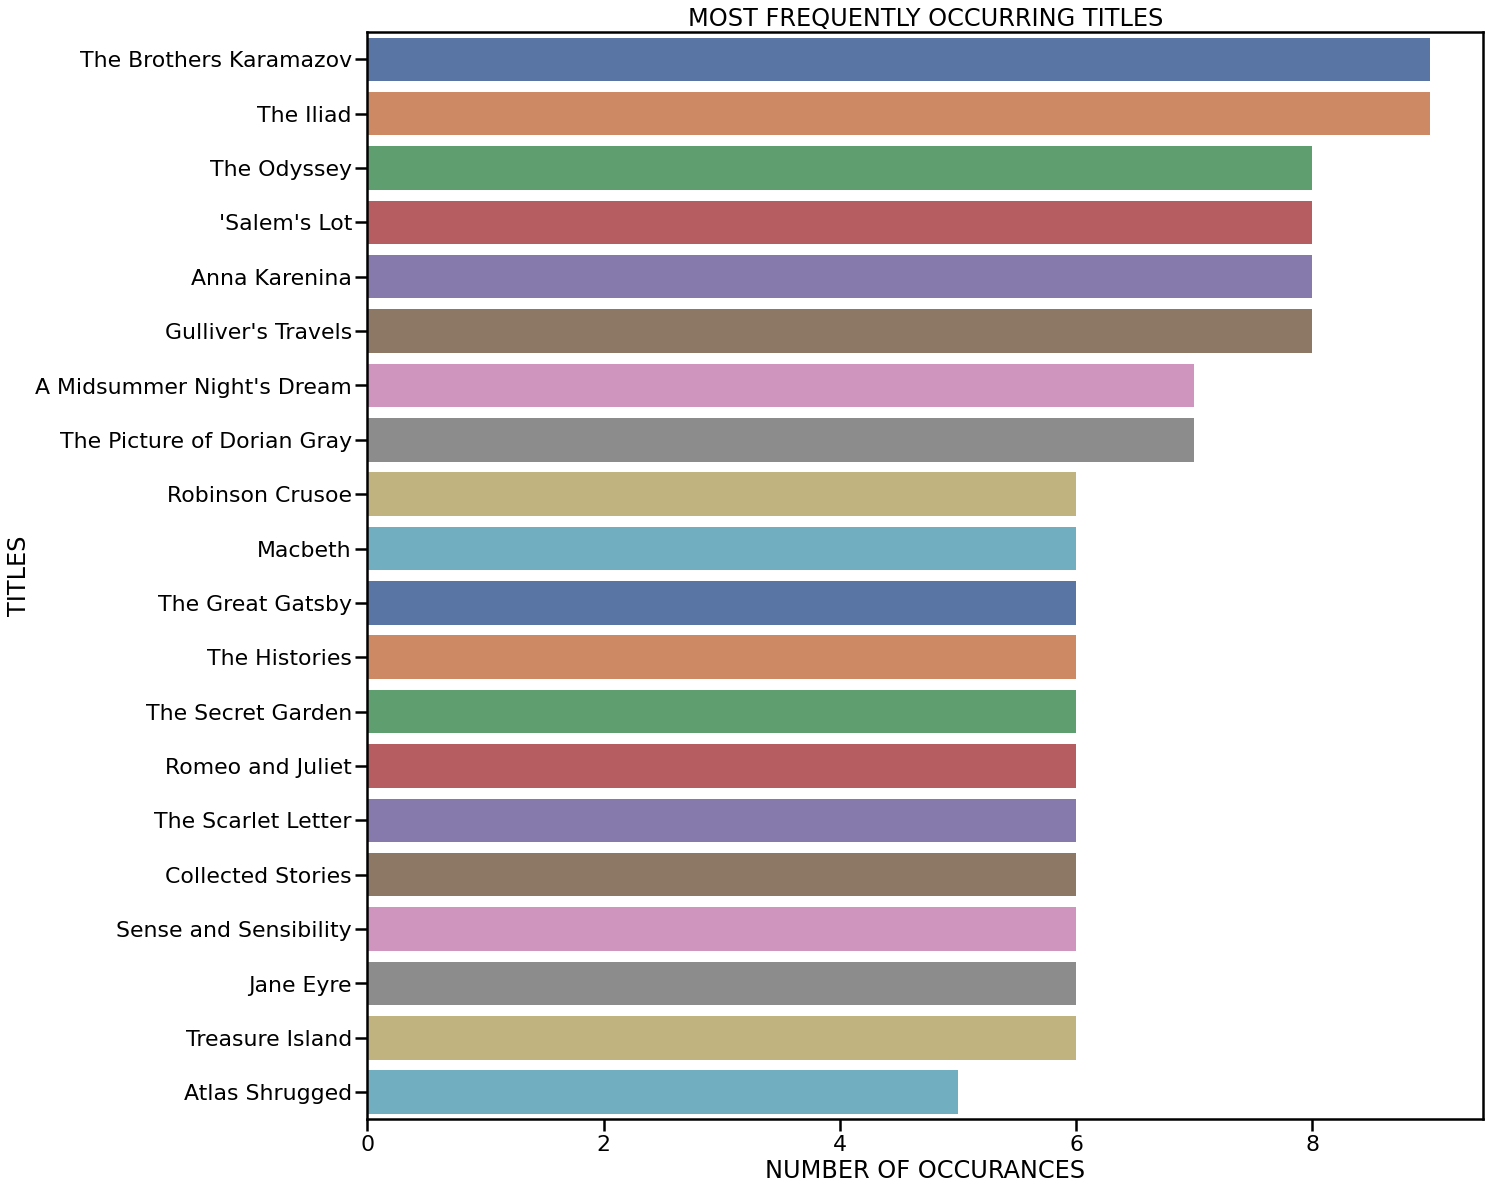

In [55]:
sns.set_context('poster')
plt.figure(figsize=(20,20))

x=title_count['count']
y=title_count['title']

ax = sns.barplot(x=x, y=y, palette='deep')


ax.set_title("MOST FREQUENTLY OCCURRING TITLES")
ax.set_xlabel("NUMBER OF OCCURANCES")
ax.set_ylabel("TITLES")
# plt.show()



### OBSERVATIONS

The titles that occur most frequently in the Goodreads data set are books that might be considered classic literature. Many of the books are in the public domain, which accounts for why there are so many different publications under different publishing companies. 

<hr>

<a id="most_rated"></a>
<font size="+1.5" color="#223452"><b>20 MOST RATED TITLES</b></font><br>

Because the Average Rating is the target variable, this is one of the more important visualizations. By looking at the 20 titles that recieved the most ratings we're able to guage the popularity of the books within this dataset. We're also able to make inferences into some of the factors that may contribute to a book's popularity. 

In [56]:
most_rated_titles = df[['title', 'ratings_count', 'publication_year']].sort_values('ratings_count', ascending = False).reset_index()
most_rated_titles = most_rated_titles.drop(['index'], axis=1)
most_rated_titles = most_rated_titles.head(50)
most_rated_titles

# most_rated_titles = df[df['title'].isin(most_rated_titles['title'].unique())]
# most_rated_titles = most_rated_titles[most_rated_titles['title'].isin(most_rated_titles['title'].unique())]
# most_rated_titles

,title,ratings_count,publication_year
0,Twilight (Twilight #1),4597666,2006
1,The Hobbit or There and Back Again,2530894,2002
2,The Catcher in the Rye,2457092,2001
3,Angels & Demons (Robert Langdon #1),2418736,2006
4,Harry Potter and the Prisoner of Azkaban (Harr...,2339585,2004
5,Harry Potter and the Chamber of Secrets (Harry...,2293963,1999
6,Harry Potter and the Order of the Phoenix (Har...,2153167,2004
7,The Fellowship of the Ring (The Lord of the Ri...,2128944,2003
8,Animal Farm,2111750,2003
9,Harry Potter and the Half-Blood Prince (Harry ...,2095690,2006


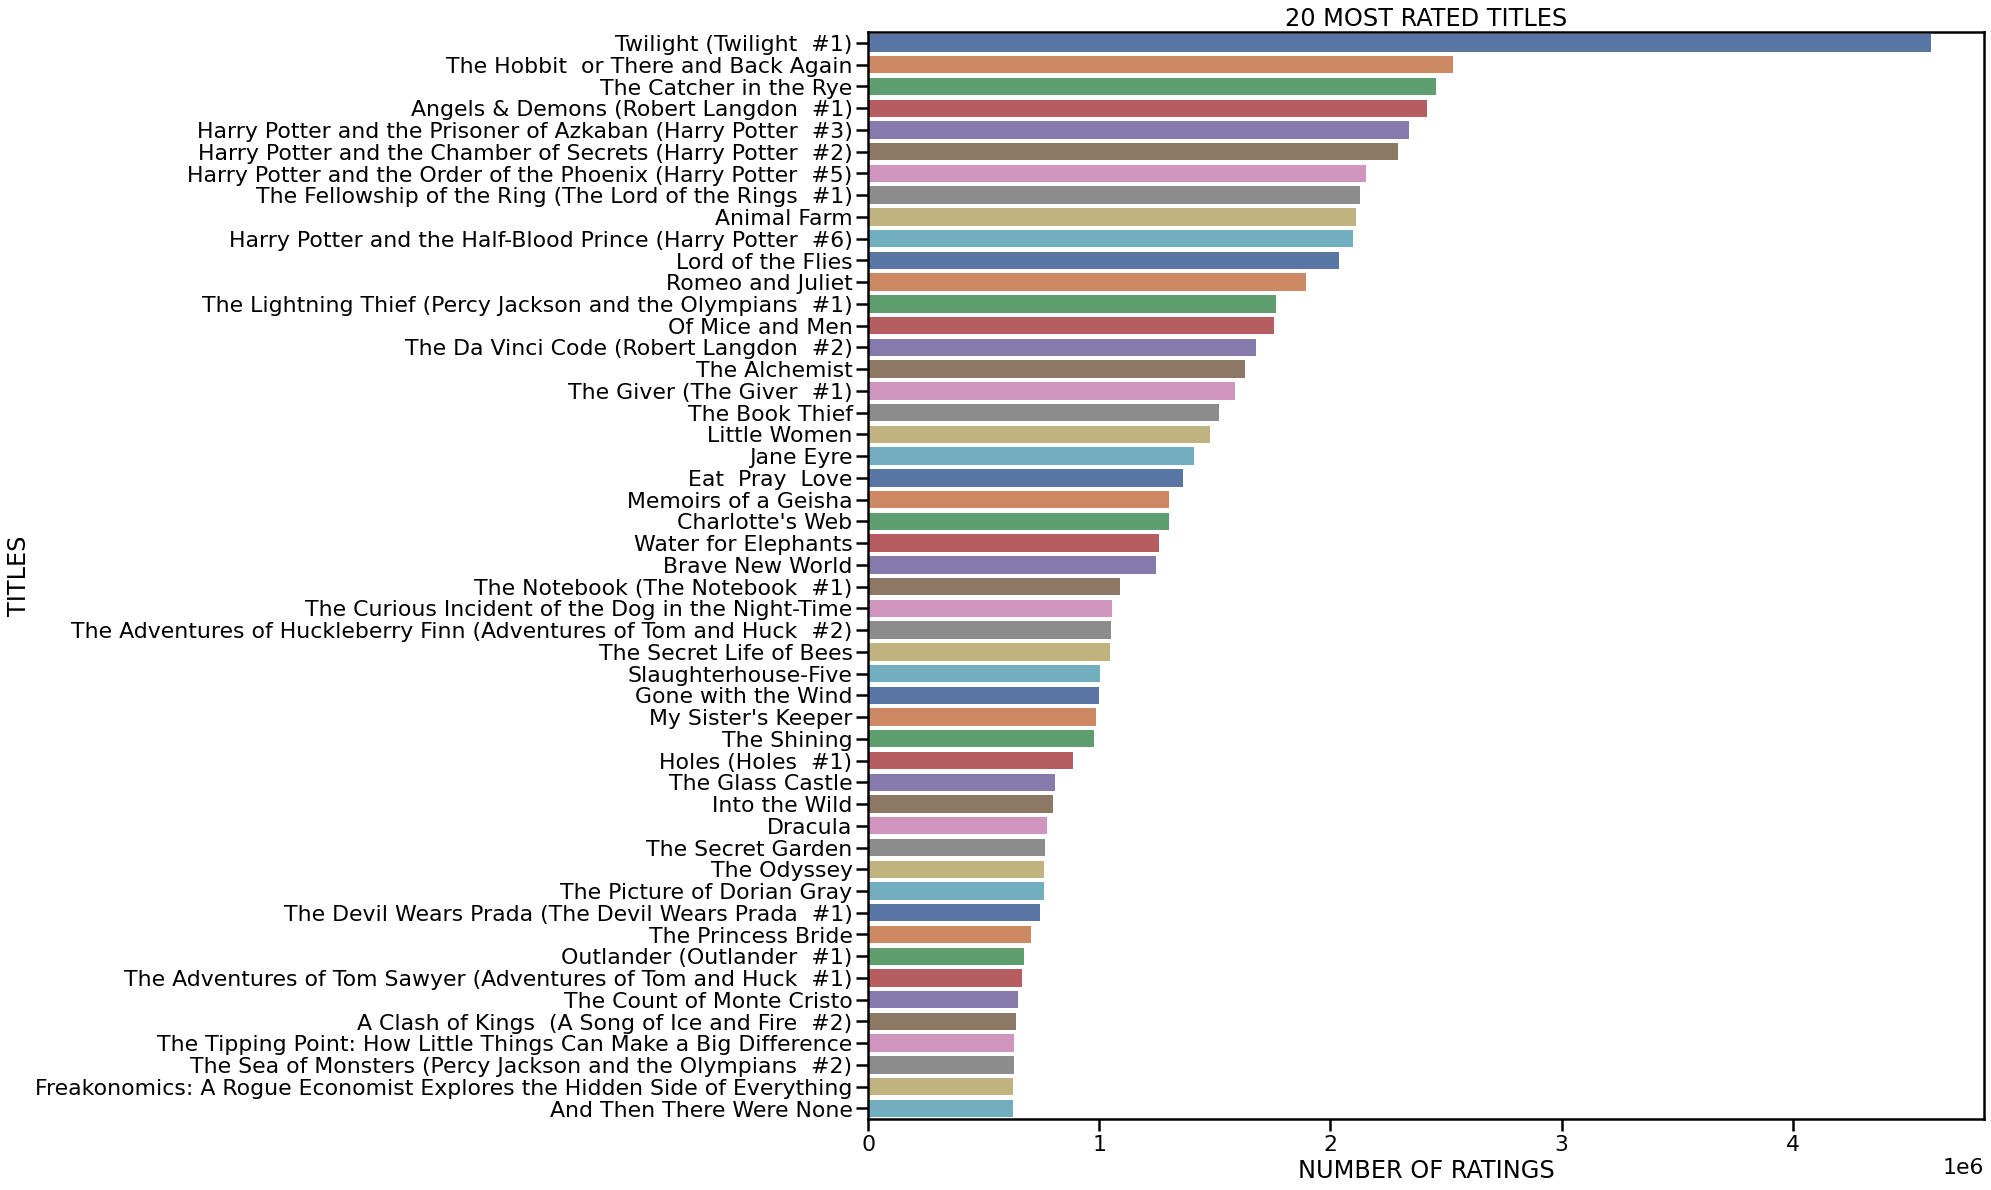

In [57]:
sns.set_context('poster')
plt.figure(figsize=(20,20))

x=most_rated_titles['ratings_count']
y=most_rated_titles['title']

sns.barplot(x=x, y=y, palette='deep')

plt.title("20 MOST RATED TITLES")
plt.xlabel("NUMBER OF RATINGS")
plt.ylabel("TITLES")
plt.show()

#### OBSERVATIONS

The 20 books with the most ratings consists of a mixture classic literature and newer titles such as the Harry Potter series and The Da Vinci Code. 

Types of Books in the list:
    * Books used in schools: "The Giver", "Animal Farm", and "Romeo and Juliet"
    * Books made into movies/TV shows: "Harry Potter", "A Clash of Kings"


<a id="highest_rated"></a>
<font size="+1.5" color="#223452"><b>20 HIGHEST RATED OF THE 50 MOST RATED TITLES</b></font><br>

In the Goodreads dataset the highest rated titles are the ones with only one or two ratings. Unfortunately this doesn't provide as clear of a representation of a book's quality as would a book with multiple ratings. 

To address this isue, I've visualized the average ratings for the books that have been rated the most times in the dataset. 

In [58]:
top_titles_list = most_rated_titles['title'].head(50).unique()

title_ratings = df.groupby(['title'])[['average_rating']].agg('mean').reset_index()
title_ratings =  title_ratings[title_ratings['title'].isin(top_titles_list)]
title_ratings =  title_ratings.sort_values('average_rating', ascending=False)
title_ratings =  title_ratings.reset_index().drop(['index'], axis=1)
title_ratings = title_ratings.head(25)


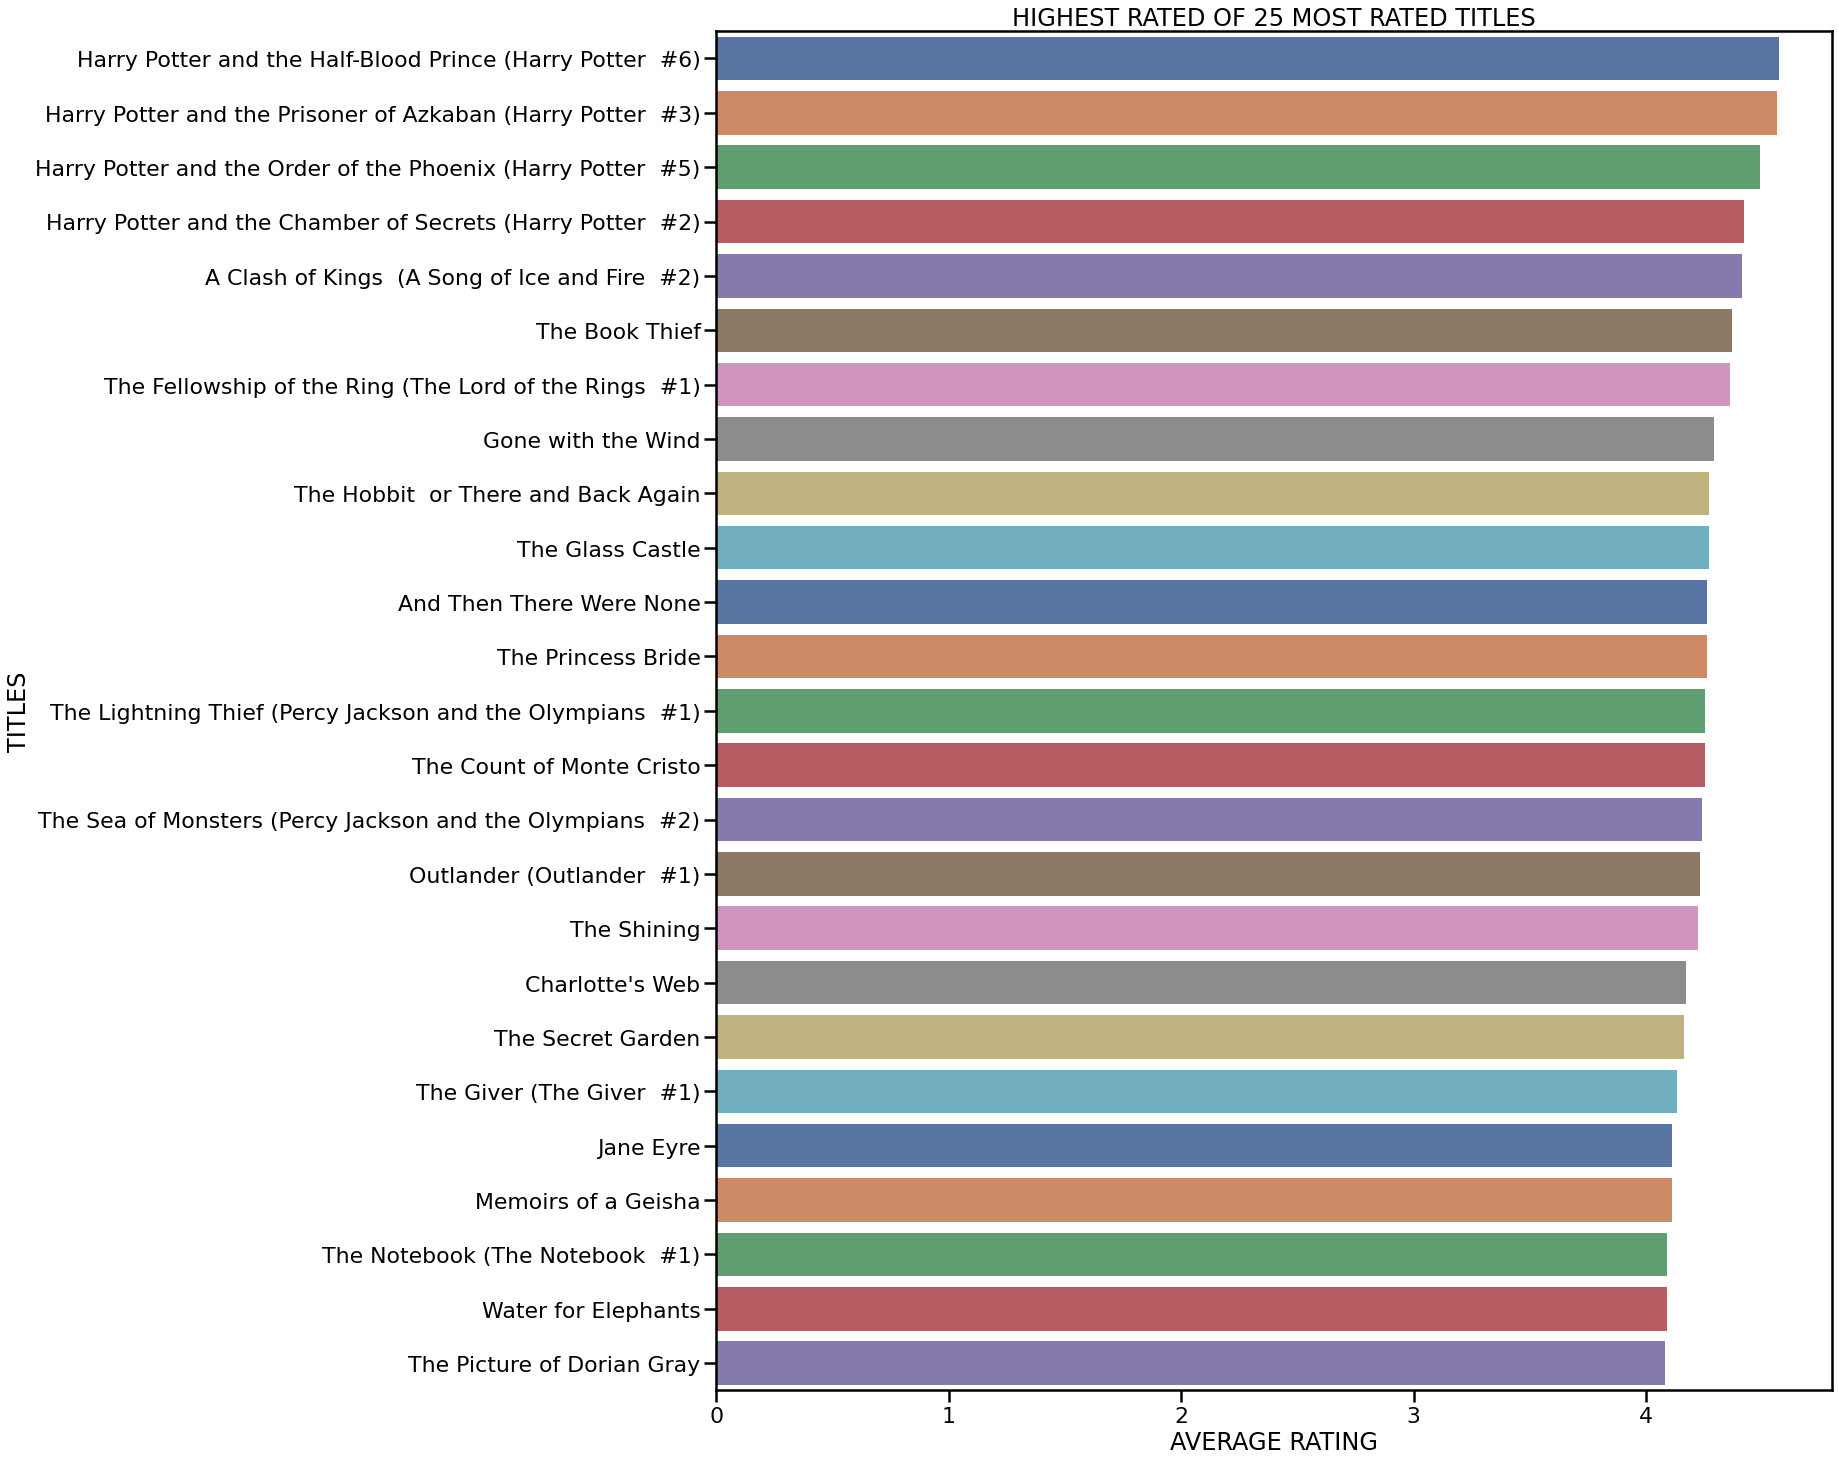

In [59]:
sns.set_context('poster')
plt.figure(figsize=(20,25))

x=title_ratings['average_rating']
y=title_ratings['title']

sns.barplot(x=x, y=y, palette='deep')

plt.title("HIGHEST RATED OF 25 MOST RATED TITLES")
plt.xlabel("AVERAGE RATING")
plt.ylabel("TITLES")
plt.show()

### OBSERVATIONS: 

Although Twilight has the most ratings, it is not included among the books with the highest average rating. 

<a id="preprocessing"></a>
<font size="+1.5" color="#223452"><b>20 MOST OCCURING AUTHORS</b></font><br>

In [60]:
author_count = df[['authors']].value_counts().to_frame().reset_index()
author_count.rename(columns={0:'count'}, inplace=True)
author_count = author_count.head(20)



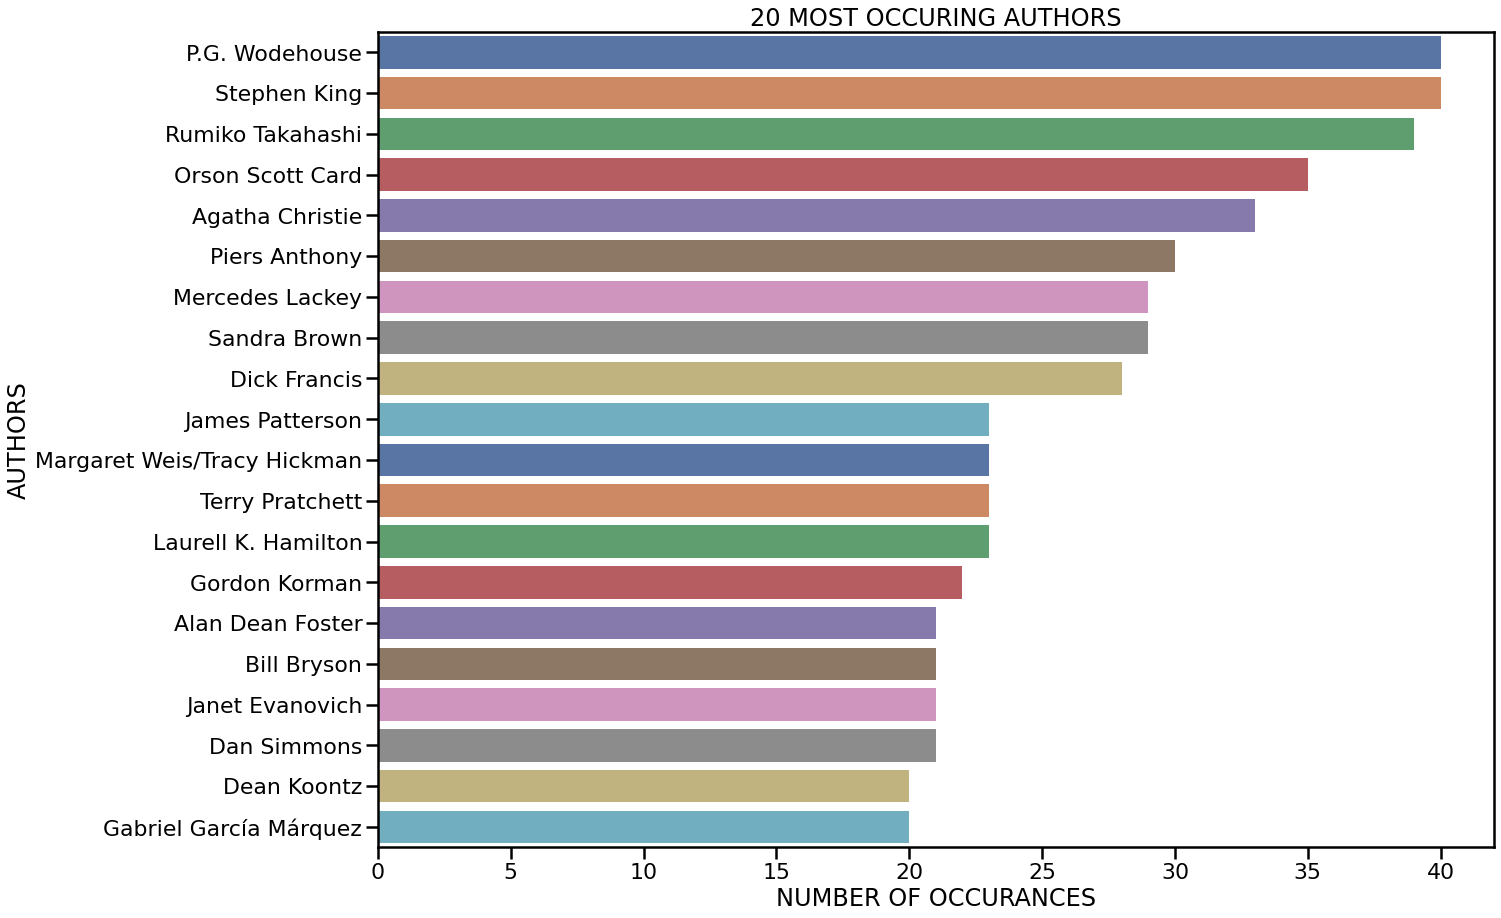

In [61]:
sns.set_context('poster')
plt.figure(figsize=(20,15))

x=author_count['count']
y=author_count['authors']

sns.barplot(x=x, y=y, palette='deep')

plt.title("20 MOST OCCURING AUTHORS")
plt.xlabel("NUMBER OF OCCURANCES")
plt.ylabel("AUTHORS")
plt.show()

<a id="preprocessing"></a>
<font size="+1.5" color="#223452"><b>HIGHEST RATED OF 20 MOST OCCURING AUTHORS</b></font><br>

In [62]:
most_rated_auth = author_count['authors'].head(20).unique()

auth_avg_rating = df.groupby(['authors'])[['average_rating']].agg('mean').reset_index()
auth_avg_rating = auth_avg_rating[auth_avg_rating['authors'].isin(most_rated_auth)]
auth_avg_rating = auth_avg_rating.sort_values('average_rating', ascending=False)
auth_avg_rating = auth_avg_rating.reset_index().drop(['index'], axis=1)
auth_avg_rating = auth_avg_rating.head(20)


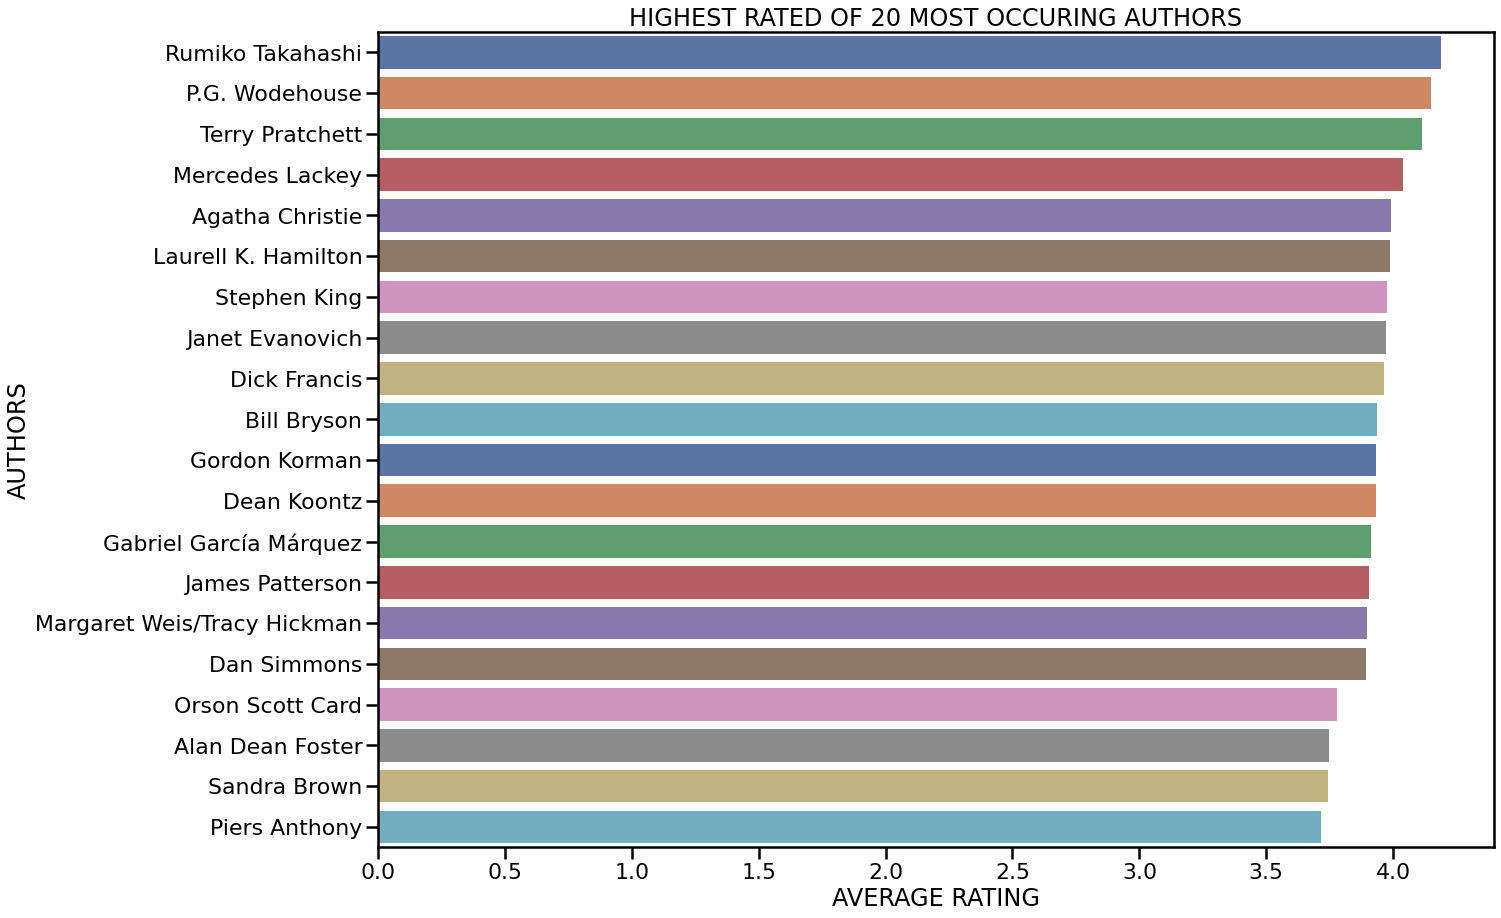

In [63]:
sns.set_context('poster')
plt.figure(figsize=(20,15))

x=auth_avg_rating['average_rating']
y=auth_avg_rating['authors']

sns.barplot(x=x, y=y, palette='deep')

plt.title("HIGHEST RATED OF 20 MOST OCCURING AUTHORS")
plt.xlabel("AVERAGE RATING")
plt.ylabel("AUTHORS")
plt.show()

<a id="preprocessing"></a>
<font size="+1.5" color="#223452"><b>YEARS WITH MOST BOOKS LISTED</b></font><br> 

In [64]:
book_years = df.groupby(['publication_year'])[['bookID']].agg('count')
book_years.rename(columns={'bookID' : 'count'}, inplace=True)
book_years = book_years.sort_values('count', ascending=False).reset_index()
book_years = book_years.head(20)
book_years = book_years.sort_values('publication_year').reset_index().drop(['index'], axis=1)


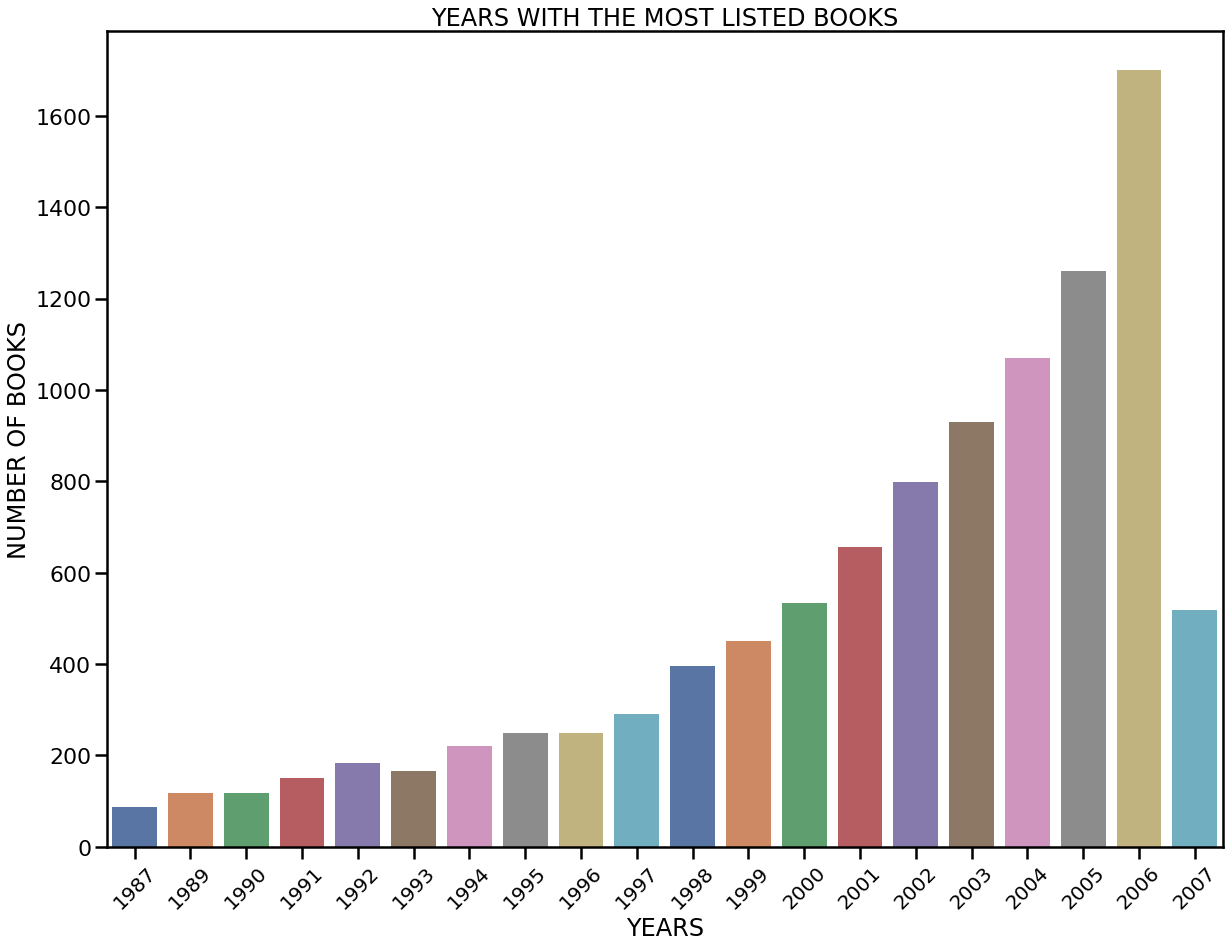

In [65]:
sns.set_context('poster')
plt.figure(figsize=(20,15))

x=book_years['publication_year']
y=book_years['count']

chart = sns.barplot(x=x, y=y, palette='deep')

plt.title("YEARS WITH THE MOST LISTED BOOKS")
plt.xlabel("YEARS")
plt.xticks(rotation=45,  horizontalalignment='center',fontweight='light',fontsize='small')
plt.ylabel("NUMBER OF BOOKS")
plt.show()



<a id="preprocessing"></a>
<font size="+1.5" color="#223452"><b>PUBLICATION MONTH COUNT</b></font><br> 

In [66]:
rating_month = df.groupby(['publication_month', 'pub_month_name'])[['bookID']].agg('count')
rating_month = rating_month.sort_values('bookID', ascending=False).reset_index()
rating_month.rename(columns={'bookID':'book_count'}, inplace=True)
rating_month = rating_month.head(20).sort_values('publication_month')

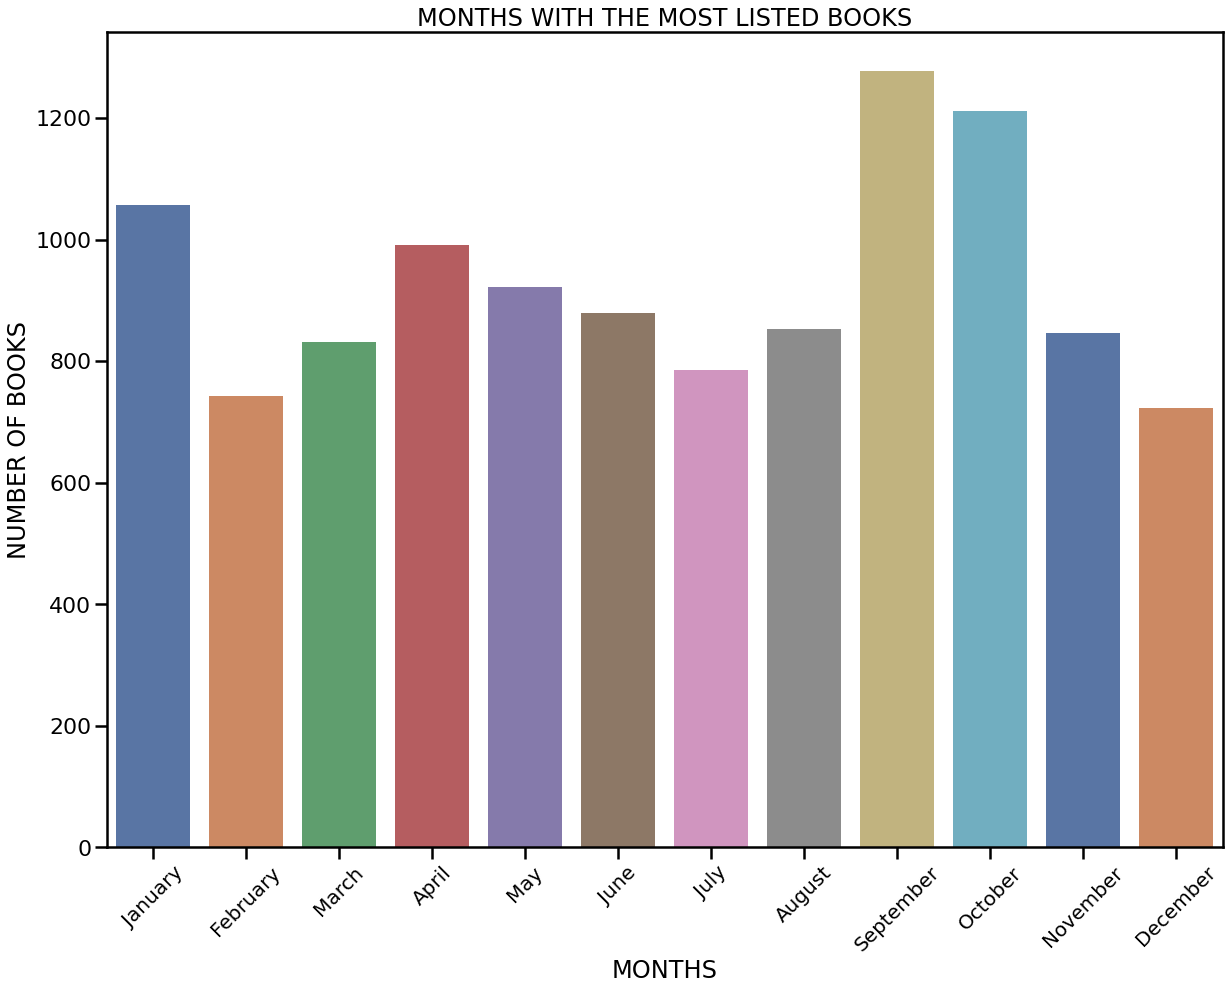

In [67]:
sns.set_context('poster')
plt.figure(figsize=(20,15))

x=rating_month['pub_month_name']
y=rating_month['book_count']

chart = sns.barplot(x=x, y=y, palette='deep')

plt.title("MONTHS WITH THE MOST LISTED BOOKS")
plt.xlabel("MONTHS")
plt.xticks(rotation=45,  horizontalalignment='center',fontweight='light',fontsize='small')
plt.ylabel("NUMBER OF BOOKS")
plt.show()


<a id="preprocessing"></a>
<font size="+1.5" color="#223452"><b>TOP 20 PUBLISHERS WITH MOST RATINGS</b></font><br> 

In [68]:
pub_ratings_count = df.groupby(['publisher'])[['ratings_count']].agg('count')
pub_ratings_count = pub_ratings_count.sort_values('ratings_count', ascending=False).reset_index()
pub_ratings_count = pub_ratings_count.head(20)

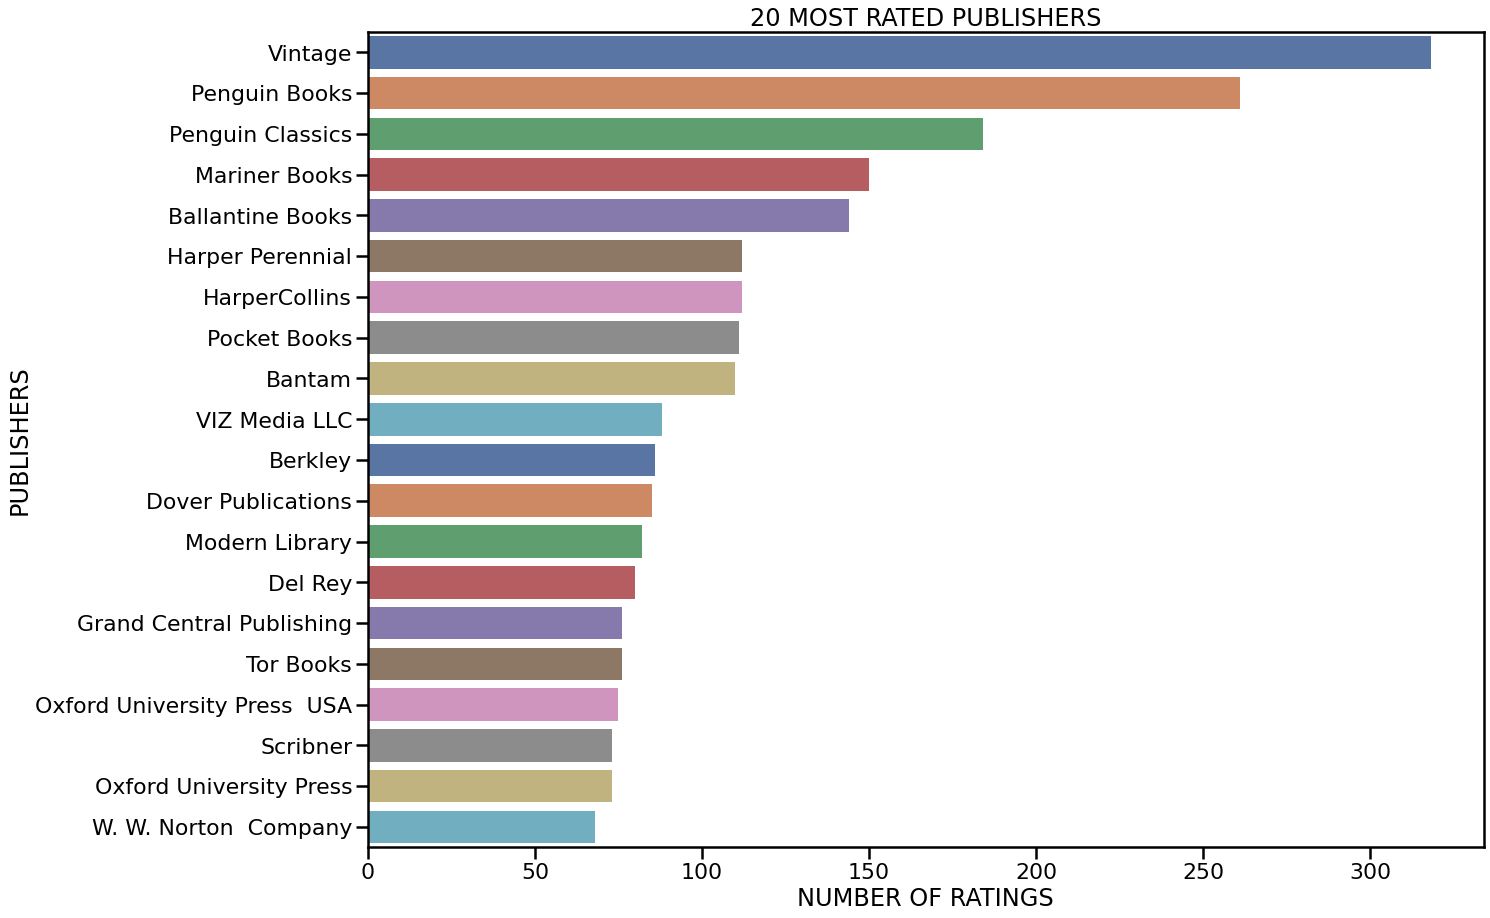

In [69]:
sns.set_context('poster')
plt.figure(figsize=(20,15))

x=pub_ratings_count['ratings_count']
y=pub_ratings_count['publisher']

sns.barplot(x=x, y=y, palette='deep')

plt.title("20 MOST RATED PUBLISHERS")
plt.xlabel("NUMBER OF RATINGS")
plt.ylabel("PUBLISHERS")
plt.show()

<a id="preprocessing"></a>
<font size="+1.5" color="#223452"><b>HIGHEST RATED OF 20 MOST RATED PUBLISHERS</b></font><br> 

In [70]:
most_rated_pub = pub_ratings_count['publisher'].head(20).unique()

pub_avg_ratings = df.groupby(['publisher'])[['average_rating']].agg('mean').reset_index()
pub_avg_ratings = pub_avg_ratings[pub_avg_ratings['publisher'].isin(most_rated_pub)]
pub_avg_ratings = pub_avg_ratings.sort_values('average_rating', ascending=False)
pub_avg_ratings = pub_avg_ratings.reset_index().drop(['index'], axis=1)

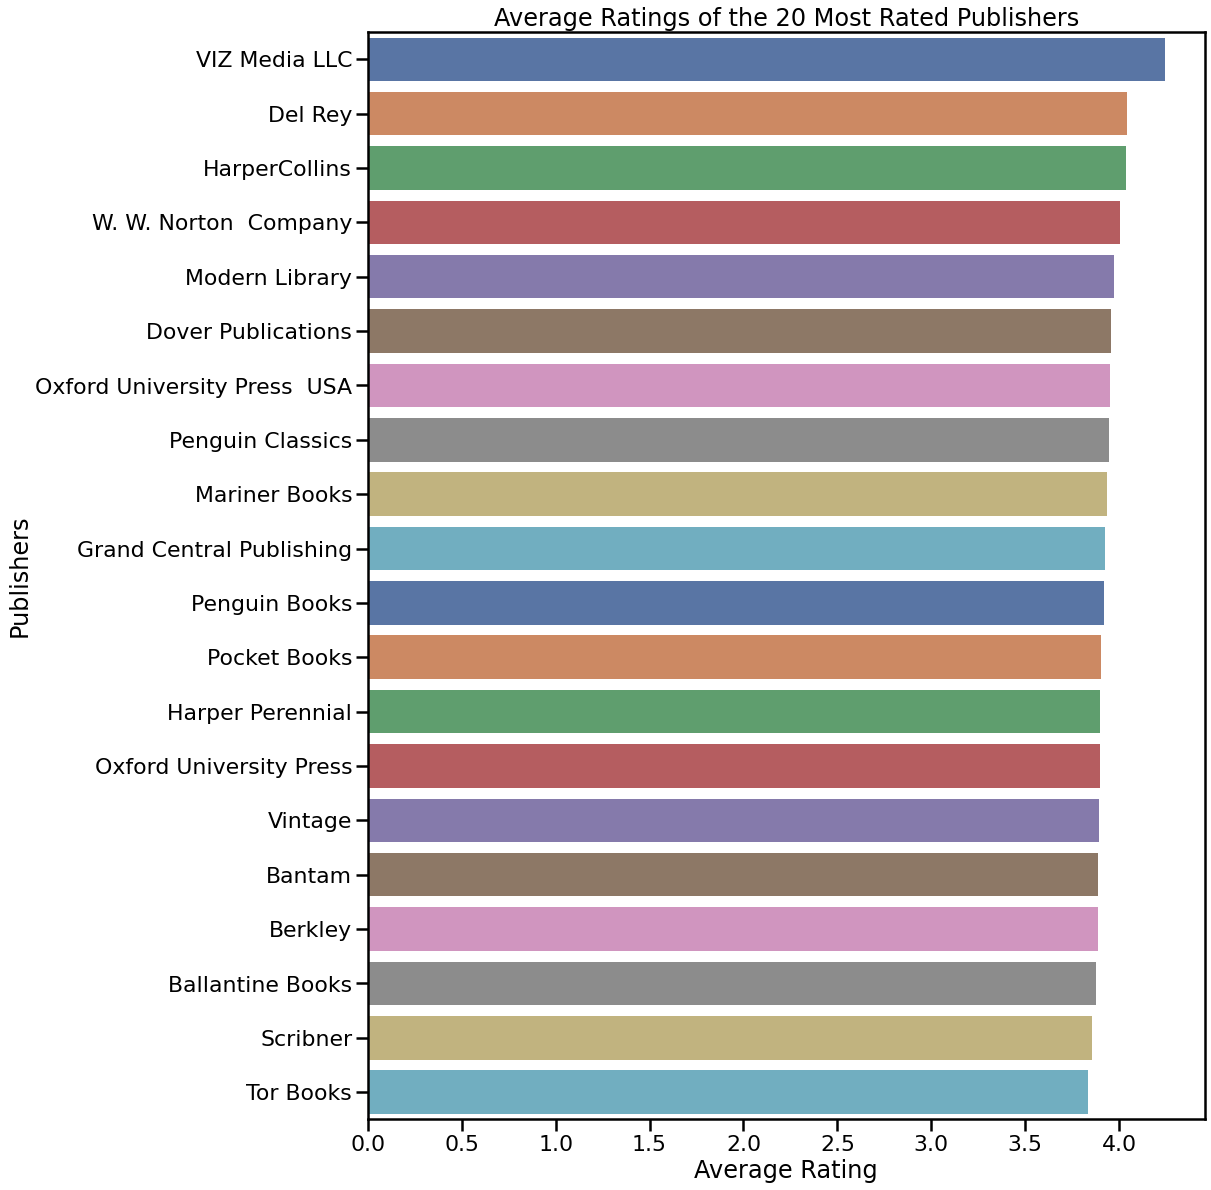

In [71]:
sns.set_context('poster')
plt.figure(figsize=(15,20))

x=pub_avg_ratings['average_rating']
y=pub_avg_ratings['publisher']

sns.barplot(x=x, y=y, palette='deep')

plt.title("Average Ratings of the 20 Most Rated Publishers")
plt.xlabel("Average Rating")
plt.ylabel("Publishers")
plt.show()

<a id="language"></a>
<font size="+1.5" color="#223452"><b>LANGUAGE DISTRIBUTION</b></font><br> 

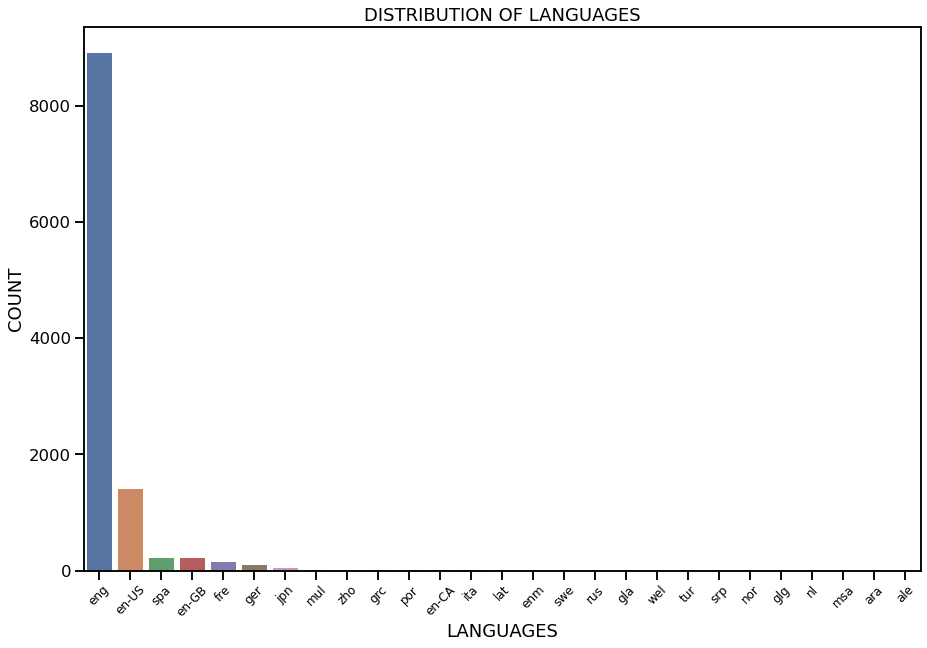

In [72]:
languages = df.groupby(['language_code'])[['title']].agg('count')
languages = languages.rename(columns={'title':'count'}).reset_index()
languages = languages.sort_values('count', ascending=False)

sns.set_context('talk')
plt.figure(figsize=(15,10))

sns.barplot(x="language_code", y='count', data=languages, palette='deep')

plt.title("DISTRIBUTION OF LANGUAGES")
plt.xlabel("LANGUAGES")
plt.xticks(rotation=45,  horizontalalignment='center',fontweight='light',fontsize='12')

plt.ylabel("COUNT")
plt.show()

<a id="ratings_dist"></a>
<font size="+1.5" color="#223452"><b>PLOTTING RATINGS DISTRIBUTION</b></font><br> 

Binning the average ratings into categories gives us a general overview of the ratings trends for the entire dataset.

In [73]:
fig = px.pie(df, values='average_rating', names='ratings_binned')
fig.show()

 <hr size="30">

# <a id='#5a'>BIVARIATE ANALYSIS</a>

<a id="rating_pg_num"></a>
<font size="+1.5" color="#223452"><b>AVERAGE RATING & NUMBER OF PAGES</b></font><br> 

In this visualization we will plot the number of pages in a book as compared to it's average rating. 

In [74]:
fig = px.scatter(x=df['average_rating'], y=df['  num_pages'])

fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(title_text='CORRELATION: AVERAGE RATING & NUM OF PAGES',
                  yaxis_title='NUM OF PAGES',
                  xaxis_title='AVERAGE RATING', 
                  title_x=0.5,
                  width = 750,
                  height=500)
fig.show()

### OBSERVATIONS

Based on the above visualization the majority of books have less than 500 pages with average ratings between 3 and 4. 

Books between 500 and 1500 pages are mostly rated in the 3.5 to 4.5 range. However, as the page numbers trend upward there is a slight increase in the ratings as well. 

The few books with pages numbering above 1500 are mostly all rated above 4.0, yet most of the books rated above 4.5 have less than 500 pages. 

Based on the above observations a causal relationship between the two variables is unable to be determined. 




<a id="rating_ratings_count"></a>
<font size="+1.5" color="#223452"><b>AVERAGE RATING & RATINGS COUNT</b></font><br> 

In [75]:
fig = px.scatter(x=df['average_rating'], y=df['ratings_count'])

fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(title_text='CORRELATION: AVERAGE RATING & RATINGS COUNT',
                  yaxis_title='ratings_count',
                  xaxis_title='AVERAGE RATING', 
                  title_x=0.5,
                  width = 750,
                  height=500)
fig.show()

### OBSERVATIONS

The higher ratings count values exist within the 3.5 to 4.5 average rating range. This may possibly indicate a correlation between higher ratings counts and average ratings.

In [76]:
sample = df[df['ratings_count']<20000]

fig = px.scatter(x=sample['average_rating'], y=sample['ratings_count'])

fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(title_text='CORRELATION: AVERAGE RATING & RATINGS COUNT',
                  yaxis_title='ratings_count',
                  xaxis_title='AVERAGE RATING', 
                  title_x=0.5,
                  width = 750,
                  height=500)
fig.show()

### OBSERVATIONS

The higher ratings count values exist within the 3.5 to 4.5 average rating range. This may possibly indicate a correlation between higher ratings counts and average ratings. 

When zooming in to the range below 20,000 ratings counts we see that as the ratings counts increase, they are more concentrated around the average rating value of 4. 

<a id="ratings_bins_text_reviews"></a>
<font size="+1.5" color="#223452"><b>CORRELATION: RATINGS BINS & TEXT REVIEWS COUNT</b></font><br> 

By using the ratings bins we're able to get a more general picture of the relationship between the number of text reviews a book has and its rating. 

For a more in depth look, we'll also look at the individual ratings compared to the text review counts.

In [77]:
ratings_reviews = df[['text_reviews_count', 'ratings_binned']].sort_values('text_reviews_count', ascending=False)
# ratings_reviews

In [78]:
fig = px.scatter(x=ratings_reviews['ratings_binned'], y=ratings_reviews['text_reviews_count'])

fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(title_text='CORRELATION: AVERAGE RATING & TEXT REVIEWS COUNT',
                  yaxis_title='TEXT REVIEWS COUNT',
                  xaxis_title='AVERAGE RATING BINS', 
                  title_x=0.5,
                  width = 750,
                  height=500)
fig.show()

In [79]:
fig = px.scatter(x=df['average_rating'], y=df['text_reviews_count'])

fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(title_text='CORRELATION: AVERAGE RATING & TEXT REVIEWS COUNT',
                  yaxis_title='TEXT REVIEWS COUNT',
                  xaxis_title='AVERAGE RATING', 
                  title_x=0.5,
                  width = 750,
                  height=500)
fig.show()

### OBSERVATIONS

Because the titles with the higher text review counts are consistently in the 3.5 - 4.5 range there might be a direct relationship between the two variables. 

<a id="rating_pub_year"></a>
<font size="+1.5" color="#223452"><b>CORRELATION: RATING & YEAR OF PUBLICATION</b></font><br> 

In [80]:
fig = px.scatter(x=df['average_rating'], y=df['publication_year'])

fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(title_text='CORRELATION: RATING & YEAR OF PUBLICATION',
                  yaxis_title='YEAR OF PUBLICATION',
                  xaxis_title='AVERAGE RATING', 
                  title_x=0.5,
                  width = 750,
                  height=500)
fig.show()

### OBSERVATIONS

Books published before 1960 tend to be almost exclusively rated above 3.5

The highest rated books were published more recently. 

Because the dataset contains many duplicate titles with different publication dates, the relationship between the two variables is more difficult to determine.


# <a href='#VI'>VI. CONCLUSION</a>

The Goodreads dataset has a lot of useful information for determining which factors may influence a book's rating and for general exploration of facts about a book.

We were able to look at variables such as publisher, date of publication, number of ratings, number of text reviews, and compare them to the average rating. 

In a future version I will add prediction models to the kernel and also explore creating a recommendation system. 

Thanks for stopping by!

-Milton 